# Collaboration and Competition

---

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain_name

'TennisBrain'

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

# examine rewards and dones
rewards = env_info.rewards    # list
dones = env_info.local_done   # list
print('The length of rewards is: {}'.format(len(rewards)))
print('The rewards look like:', rewards)
print('The length of dones is: {}'.format(len(dones)))
print('The dones look like:', dones)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The length of rewards is: 2
The rewards look like: [0.0, 0.0]
The length of dones is: 2
The dones look like: [False, False]


### 3. Take Random Actions in the Environment

Next code cell shows how to use the Python API to control the agent and receive feedback from the environment.

Note that you should set `train_mode=True` to restart the environment.

In [4]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            print('Episode {} is finished with {} steps'.format(i+1, steps))
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Episode 1 is finished with 15 steps
Total score (averaged over agents) this episode: -0.004999999888241291
Episode 2 is finished with 14 steps
Total score (averaged over agents) this episode: -0.004999999888241291
Episode 3 is finished with 14 steps
Total score (averaged over agents) this episode: -0.004999999888241291
Episode 4 is finished with 31 steps
Total score (averaged over agents) this episode: 0.04500000085681677
Episode 5 is finished with 14 steps
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. Training with DDPG

D:\Projects\MARL-tennis\ddpg_agent.py:80: UserWarning: Using a target size (torch.Size([256, 2])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  critic_loss = F.mse_loss(Q_predict, Q_target)


Episode 100/5000 | Average Score (max) Over Past 100 Episodes: 0.01
Episode 200/5000 | Average Score (max) Over Past 100 Episodes: 0.0
Episode 300/5000 | Average Score (max) Over Past 100 Episodes: 0.0
Episode 400/5000 | Average Score (max) Over Past 100 Episodes: 0.01
Episode 500/5000 | Average Score (max) Over Past 100 Episodes: 0.02
Episode 600/5000 | Average Score (max) Over Past 100 Episodes: 0.0
Episode 700/5000 | Average Score (max) Over Past 100 Episodes: 0.0
Episode 800/5000 | Average Score (max) Over Past 100 Episodes: 0.02
Episode 900/5000 | Average Score (max) Over Past 100 Episodes: 0.06
Episode 1000/5000 | Average Score (max) Over Past 100 Episodes: 0.07
Episode 1100/5000 | Average Score (max) Over Past 100 Episodes: 0.09
Episode 1200/5000 | Average Score (max) Over Past 100 Episodes: 0.11
Episode 1300/5000 | Average Score (max) Over Past 100 Episodes: 0.14
Episode 1400/5000 | Average Score (max) Over Past 100 Episodes: 0.11
Episode 1500/5000 | Average Score (max) Over Pa

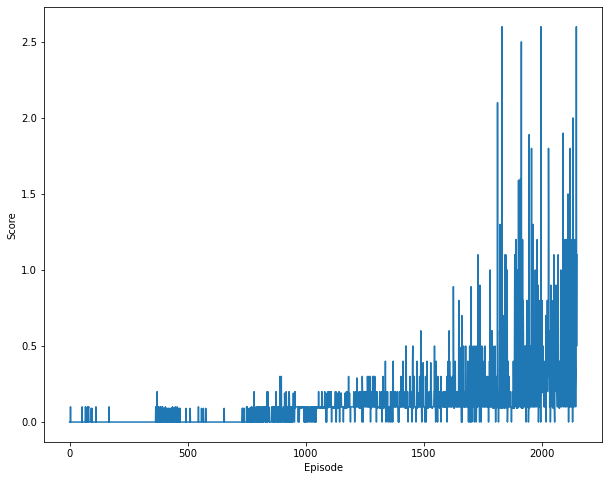

In [5]:
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from maddpg_agent import MADDPG

%reload_ext autoreload
%autoreload 2
%matplotlib inline

num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
state_size = env_info.vector_observations.shape[1]

n_episodes = 5000
score_threshold = 0.5
scores = []
episodes_bar = tqdm(total=n_episodes, desc='Episodes')

agent_maddpg = MADDPG(num_agents, state_size, action_size, [200, 150, 200, 150], 0)

for i_episode in range(1, n_episodes + 1):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    score = np.zeros(num_agents)
    
    agent_maddpg.reset()
    
    while True:
        actions = agent_maddpg.act(states)
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        
        agent_maddpg.step(states, actions, rewards, next_states, dones)
        
        states = next_states
        score += rewards
        
        if any(dones):
            break
    
    score_max = np.max(score)
    scores.append(score_max)
    average_score = np.mean(scores[-100:])
    
    if i_episode % 100 == 0:
        print(f'Episode {i_episode}/{n_episodes} | Average Score (max) Over Past 100 Episodes: {round(average_score, 2)}')
    if average_score >= score_threshold:
        agent_maddpg.save_weights()
        print(f'Environment solved in {i_episode}!')
        break
        
    episodes_bar.update(1)
    
episodes_bar.close()

plt.figure(figsize=(10, 8))
plt.plot(scores)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.savefig('score_plot_MADDPG.png', dpi=300, bbox_inches='tight')
plt.show()

When finished, close the environment.

In [6]:
env.close()